# <font color = green> FIXING THE CONTENT </font>
***

## <font color = 'blue'> Example: Average income </font>

We are studying the ** monthly income of heads of households with income up to R $ \ $$ 5,000.00 in Brazil **. Our supervisor determined that the ** maximum error in relation to the average is R $ \ $$ 10.00 **. We know that the ** population standard deviation ** of this group of workers is ** R $ \ $$ 1,082.79 ** and that the ** population average ** is ** R $ \ $$ 1,426.54 * *. For a ** 95% confidence level **, what should the sample size of our study be? What is the confidence interval for the mean considering the sample size obtained?

### Constructing the dataset as specified by the problem

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv('data/data.csv', sep = ',')

income_5000 = data.query('Income <= 5000')['Income']

In [6]:
sigma = income_5000.std()
sigma

1082.794549030635

In [8]:
mean = income_5000.mean()
mean

1426.5372144947232

### Calculating the sample size

In [14]:
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())

n

45039

### Calculating the confidence interval for the mean

In [10]:
interval = norm.interval(alpha = 0.95, loc = mean, scale = sigma / np.sqrt(n))
interval

(1416.5372144947232, 1436.5372144947232)

### Performing a graphic test

<AxesSubplot:>

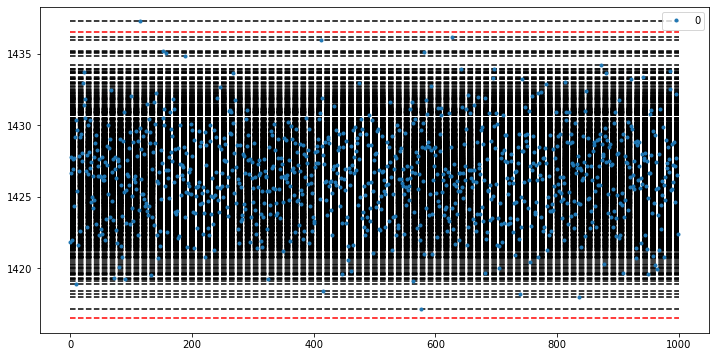

In [17]:
import matplotlib.pyplot as plt

simulation_size = 1000

mean = [income_5000.sample(n = n).mean() for i in range(1, simulation_size)]
mean = pd.DataFrame(mean)

ax = mean.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = mean, xmin = 0, xmax = simulation_size, colors = 'black', linestyles = 'dashed')

ax.hlines(y = interval[0], xmin = 0, xmax = simulation_size, colors = 'red', linestyles = 'dashed')

ax.hlines(y = interval[1], xmin = 0, xmax = simulation_size, colors = 'red', linestyles = 'dashed')

ax